# Линейный классификатор на TensorFlow

In [214]:
# импортируем необходимые библиотеки
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [215]:
# создадим искусственные данные 1000 шт. каждого класса
num_samples = 1000
positive_samples = np.random.multivariate_normal([2.5,0], [[1, 0.5], [0.5, 1]], num_samples)
negative_samples = np.random.multivariate_normal([0,2.5], [[1, 0.5], [0.5, 1]], num_samples)

In [216]:
# объединим в один inputs
inputs = np.vstack((positive_samples, negative_samples)).astype('float32')

In [217]:
# создадим наши таргеты
targets = np.vstack((np.zeros((num_samples, 1), dtype="float32"), np.ones((num_samples, 1), dtype="float32")))

<function matplotlib.pyplot.show(close=None, block=None)>

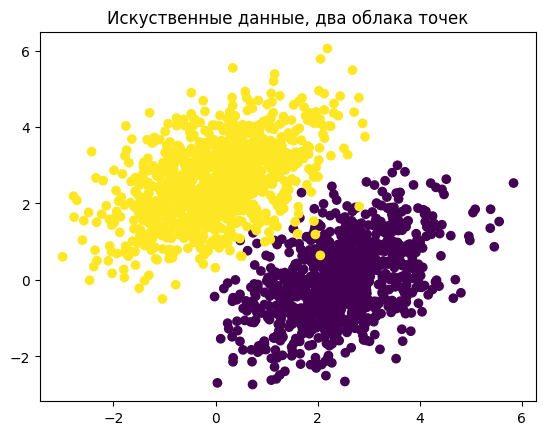

In [218]:
# выведем наши входные данные
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.title('Искуственные данные, два облака точек')
plt.show

In [219]:
# создадим наши веса
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(tf.zeros(output_dim))

In [220]:
# функция прямого прохода
def model(inputs):
  return tf.matmul(inputs, W) + b

In [221]:
# функция потерь вычисляющая средний квадрат ошибки
def square_loss(targets, predictions):
  loss = tf.square(targets - predictions)
  return tf.reduce_mean(loss)

In [222]:
# скорость обучения
learning_rate = 0.1
# функция этапа обучения нашей модели
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_W, grad_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_W * learning_rate)
  b.assign_sub(grad_b * learning_rate)
  return loss

In [223]:
# цикл обучения
num_epochs = 45
for step in range(num_epochs):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.4332
Loss at step 1: 0.1051
Loss at step 2: 0.0866
Loss at step 3: 0.0805
Loss at step 4: 0.0757
Loss at step 5: 0.0715
Loss at step 6: 0.0677
Loss at step 7: 0.0643
Loss at step 8: 0.0613
Loss at step 9: 0.0586
Loss at step 10: 0.0561
Loss at step 11: 0.0540
Loss at step 12: 0.0520
Loss at step 13: 0.0503
Loss at step 14: 0.0487
Loss at step 15: 0.0473
Loss at step 16: 0.0461
Loss at step 17: 0.0450
Loss at step 18: 0.0440
Loss at step 19: 0.0431
Loss at step 20: 0.0423
Loss at step 21: 0.0416
Loss at step 22: 0.0409
Loss at step 23: 0.0404
Loss at step 24: 0.0398
Loss at step 25: 0.0394
Loss at step 26: 0.0390
Loss at step 27: 0.0386
Loss at step 28: 0.0383
Loss at step 29: 0.0380
Loss at step 30: 0.0377
Loss at step 31: 0.0375
Loss at step 32: 0.0373
Loss at step 33: 0.0371
Loss at step 34: 0.0369
Loss at step 35: 0.0368
Loss at step 36: 0.0366
Loss at step 37: 0.0365
Loss at step 38: 0.0364
Loss at step 39: 0.0363
Loss at step 40: 0.0362
Loss at step 41: 0.0361
Lo

In [224]:
# прогноз нашей модели
predictions = model(inputs)

<function matplotlib.pyplot.show(close=None, block=None)>

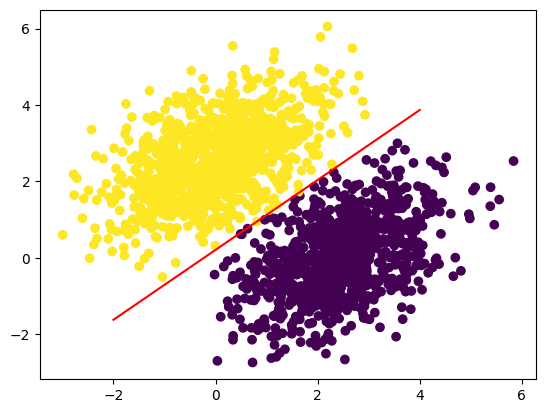

In [225]:
# выведем прогноз нашей модели и нашу модель - линию
x = np.linspace(-2, 4, 100)
y =  - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.scatter(inputs[:,0], inputs[:,1], c=predictions > 0.5)
plt.plot(x, y, '-r')
plt.show

In [226]:
# получившиеся веса модели
W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.16292979],
        [ 0.1780905 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.46290183], dtype=float32)>)

## Повторение - мать учения

Text(0.5, 1.0, 'входные данные')

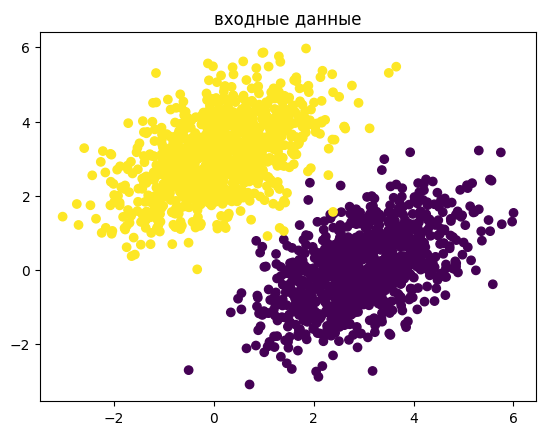

In [227]:
num = 1000
positive = np.random.multivariate_normal([3,0], [[1, 0.5], [0.5, 1]], num)
negative = np.random.multivariate_normal([0,3], [[1, 0.5], [0.5, 1]], num)

targ = np.vstack((np.zeros((num, 1)), np.ones((num, 1)))).astype('float32')

inp = np.vstack((positive, negative)).astype('float32')
plt.scatter(inp[:,0], inp[:,1], c=targ)
plt.title('входные данные')

In [228]:
inp_dim = 2
out_dim = 1
W = tf.Variable(tf.random.uniform((inp_dim, out_dim)))
b = tf.Variable(tf.zeros(out_dim))

In [229]:
def model(inp):
  return tf.matmul(inp, W) + b

In [230]:
def los(targ, inp):
  pred = model(inp)
  loss = tf.square(targ - pred)
  return tf.reduce_mean(loss)

In [231]:
lr = 0.1
def fit(inp, targ):
  with tf.GradientTape() as tape:
    loss = los(targ, inp)
  g_W, g_b = tape.gradient(loss, [W, b])
  W.assign_sub(g_W * lr)
  b.assign_sub(g_b * lr)
  return loss

In [232]:
ep = 55
for s in range(ep):
  loss = fit(inp, targ)
  print(f'Шаг {s+1}, loss: {loss:.4f}')

Шаг 1, loss: 0.3104
Шаг 2, loss: 0.1281
Шаг 3, loss: 0.0923
Шаг 4, loss: 0.0820
Шаг 5, loss: 0.0765
Шаг 6, loss: 0.0721
Шаг 7, loss: 0.0681
Шаг 8, loss: 0.0645
Шаг 9, loss: 0.0613
Шаг 10, loss: 0.0582
Шаг 11, loss: 0.0555
Шаг 12, loss: 0.0529
Шаг 13, loss: 0.0506
Шаг 14, loss: 0.0484
Шаг 15, loss: 0.0465
Шаг 16, loss: 0.0447
Шаг 17, loss: 0.0430
Шаг 18, loss: 0.0415
Шаг 19, loss: 0.0401
Шаг 20, loss: 0.0388
Шаг 21, loss: 0.0376
Шаг 22, loss: 0.0366
Шаг 23, loss: 0.0356
Шаг 24, loss: 0.0347
Шаг 25, loss: 0.0338
Шаг 26, loss: 0.0331
Шаг 27, loss: 0.0324
Шаг 28, loss: 0.0317
Шаг 29, loss: 0.0311
Шаг 30, loss: 0.0306
Шаг 31, loss: 0.0301
Шаг 32, loss: 0.0296
Шаг 33, loss: 0.0292
Шаг 34, loss: 0.0288
Шаг 35, loss: 0.0285
Шаг 36, loss: 0.0281
Шаг 37, loss: 0.0278
Шаг 38, loss: 0.0276
Шаг 39, loss: 0.0273
Шаг 40, loss: 0.0271
Шаг 41, loss: 0.0269
Шаг 42, loss: 0.0267
Шаг 43, loss: 0.0265
Шаг 44, loss: 0.0263
Шаг 45, loss: 0.0262
Шаг 46, loss: 0.0261
Шаг 47, loss: 0.0259
Шаг 48, loss: 0.0258
Ш

In [233]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.13829243],
       [ 0.16508703]], dtype=float32)>

In [234]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.44333002], dtype=float32)>

In [235]:
pred = model(inp)

<function matplotlib.pyplot.show(close=None, block=None)>

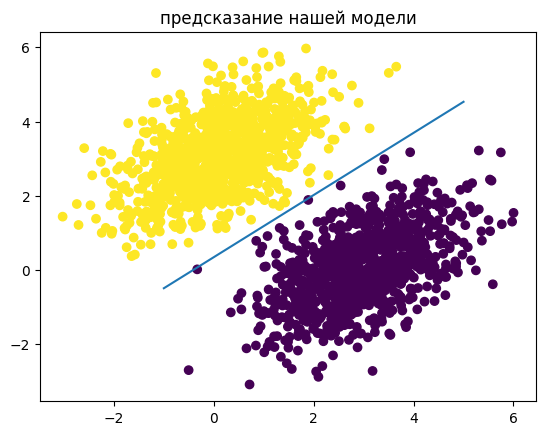

In [236]:
x = np.linspace(-1, 5, 100)
y = - W[0] * x / W[1] + (0.5 - b) / W[1]
plt.scatter(inp[:,0], inp[:,1], c=(pred > 0.5))
plt.plot(x , y)
plt.title('предсказание нашей модели')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

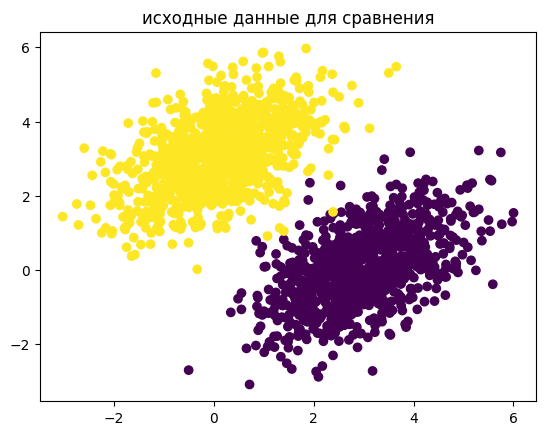

In [238]:
plt.scatter(inp[:,0], inp[:,1], c=targ)
plt.title('исходные данные для сравнения')
plt.show